In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN

In [36]:
df = pd.read_csv('afterdrop.csv')
df = df[df.columns[1:]]
a = df.corr()
corr = pd.DataFrame(a.iloc[-2]).transpose()
corr = corr.drop(['EFF'],axis=1).sort_values(by = 'EFF', axis=1,ascending=False)
corr

,득점 평균,득점 전체,자유투 성공,굿디펜스,자유투 시도,스틸,2점슛 성공,3점슛 성공,전체 어시스트,평균 어시스트,...,테크니컬 파울,대학교_경희대학교,대학교_단국대학교,대학교_동국대학교,대학교_건국대학교,대학교_상명대학교,대학교_명지대학교,대학교_조선대학교,대학교_성균관대학교,대회년도
EFF,0.225899,0.212435,0.208732,0.198748,0.196095,0.191153,0.181391,0.172829,0.162247,0.157814,...,-0.010593,-0.021683,-0.023176,-0.042343,-0.060349,-0.063228,-0.063665,-0.070613,-0.097541,-0.14309


In [111]:
data = df[["3점슛 시도","2점슛 시도" ,"키"]]

In [112]:
data["biyul"] = 100.0 * 2*data["3점슛 시도"]/(2*data["3점슛 시도"]+data["2점슛 시도"])

<ipython-input-112-14a3b9d8b0ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["biyul"] = 100.0 * 2*data["3점슛 시도"]/(2*data["3점슛 시도"]+data["2점슛 시도"])


In [113]:
data = data[["키","biyul"]]

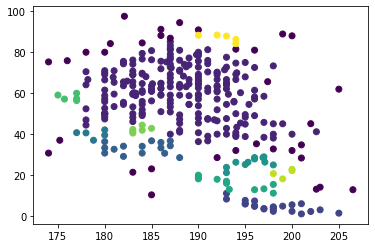

In [119]:
db = DBSCAN(eps = 2, min_samples = 4)
db.fit(data)

cluster_pred = db.fit_predict(data)

x = data['키']
y = data['biyul']
plt.scatter(x, y, c = cluster_pred)

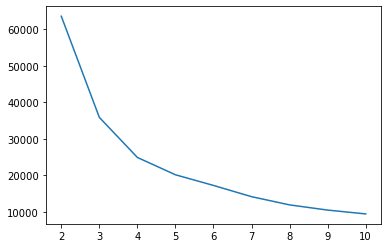

In [120]:
from sklearn.cluster import KMeans
import seaborn as sns
inertia = list()
n_clusters = list()
for i in range(2,11):
    n_clusters.append(i)
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

sns.lineplot(x=n_clusters, y=inertia)

In [125]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [143]:
clusterlist = []
for i in range(3):
    tmplist = []
    for j in range(len(cluster_pred)):
        if(cluster_pred[j]==i):
            tmplist.append(j)
    clusterlist.append(tmplist)

In [144]:
clusterlist

[[0,
  2,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  25,
  26,
  28,
  29,
  30,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  46,
  48,
  50,
  51,
  52,
  53,
  55,
  56,
  58,
  59,
  63,
  64,
  65,
  68,
  69,
  70,
  71,
  77,
  79,
  80,
  81,
  83,
  87,
  90,
  91,
  92,
  94,
  95,
  96,
  97,
  98,
  101,
  102,
  103,
  105,
  106,
  108,
  111,
  113,
  116,
  117,
  120,
  121,
  122,
  124,
  125,
  126,
  128,
  129,
  131,
  133,
  134,
  136,
  137,
  143,
  144,
  145,
  146,
  147,
  148,
  150,
  152,
  153,
  156,
  157,
  158,
  160,
  162,
  164,
  166,
  167,
  168,
  169,
  170,
  171,
  178,
  182,
  183,
  185,
  186,
  188,
  189,
  190,
  191,
  192,
  193,
  198,
  199,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  212,
  213,
  215,
  217,
  221,
  222,
  223,
  224,
  226,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  236,
  237,
  238,
  239,
  240,
  241,
  244,
  245,
  246,


,Unnamed: 0,선수명,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,테크니컬 파울,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,kbl_eff,대회년도,대학교
0,0,강권희,3,397,2,0,1,1,1.000,0,...,0,0,0,0,2,0,0,11.0875,2008,동국대학교
1,1,강권희,1,2040,11,11,2,3,0.667,2,...,0,1,0,0,2,0,0,11.0875,2009,동국대학교
2,2,강권희,3,4891,25,8,5,15,0.333,5,...,0,3,0,0,7,0,0,11.0875,2010,동국대학교
3,3,강병진,4,3255,6,1,3,9,0.333,0,...,0,2,0,0,4,0,0,6.3600,2010,건국대학교
4,4,강병진,4,5308,23,5,5,11,0.455,4,...,0,2,0,0,6,0,0,6.3600,2009,건국대학교
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,2577,홍순규,16,33921,223,13,96,197,0.487,0,...,0,14,2,4,48,0,0,2.5500,2015,단국대학교
2578,2578,홍순규,16,24374,103,6,46,108,0.426,0,...,0,6,8,1,40,0,0,2.5500,2017,단국대학교
2579,2579,홍순규,3,6228,34,11,15,31,0.484,0,...,0,3,0,1,6,0,0,2.5500,2014,단국대학교
2580,2580,황진원,4,9147,60,15,17,31,0.548,6,...,0,6,1,0,6,0,0,10.9030,1999,중앙대학교


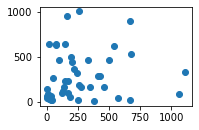

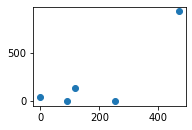

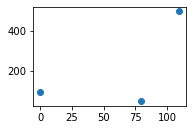

In [146]:
for i in range(3):
    acclist = []
    regressor = DecisionTreeRegressor(criterion='mse',max_depth = 10)
    X = df[corr.columns[:5]].iloc[clusterlist[i]]
    y = df['EFF'].iloc[clusterlist[i]]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    y_testdata = pd.DataFrame(y_test).reset_index(drop=True)
    y_preddata = pd.DataFrame(y_pred)
    result = pd.concat([y_testdata,y_preddata],axis=1)
    result
    fig = plt.figure()
    tmppic = fig.add_subplot(2,2,i+1)
    tmppic.scatter(result['EFF'], result[0])


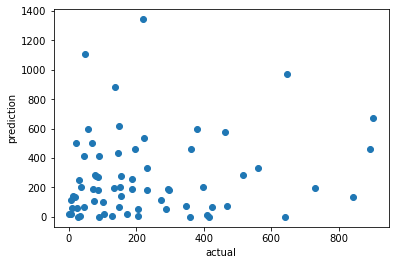

In [81]:
regressor = DecisionTreeRegressor(criterion='mse',max_depth = 15)
X = df[corr.columns[1:2]]
y = df['EFF']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_testdata = pd.DataFrame(y_test).reset_index(drop=True)
y_preddata = pd.DataFrame(y_pred)
result = pd.concat([y_testdata,y_preddata],axis=1)
result
plt.scatter(result['EFF'], result[0])
plt.xlabel("actual")
plt.ylabel("prediction")
plt.show()

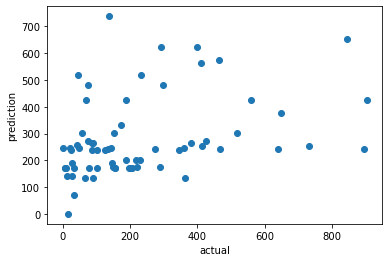

In [98]:
regressor = DecisionTreeRegressor(criterion='mse',max_depth = 10)
X = df[corr.columns[2:3]]
y = df['EFF']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_testdata = pd.DataFrame(y_test).reset_index(drop=True)
y_preddata = pd.DataFrame(y_pred)
result = pd.concat([y_testdata,y_preddata],axis=1)
result
plt.scatter(result['EFF'], result[0])
plt.xlabel("actual")
plt.ylabel("prediction")
plt.show()

In [37]:
"""
for k in range(1, 6):
    X = df2[a.columns[:k]]
    y = df2['kbl_eff']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
acclist
"""

"\nfor k in range(1, 6):\n    X = df2[a.columns[:k]]\n    y = df2['kbl_eff']\n    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)\n    regressor.fit(X_train,y_train)\n    y_pred = regressor.predict(X_test)\nacclist\n"

In [45]:

y_test

,kbl_eff
0,9.036000
1,6.684762
2,13.138462
3,2.400000
4,12.310000
...,...
512,8.042500
513,12.134516
514,14.715000
515,6.870000


In [44]:
y_pred = pd.DataFrame(y_pred)

,0
0,9.214207
1,9.214207
2,7.920474
3,7.920474
4,7.920474
...,...
512,7.007089
513,9.214207
514,9.214207
515,7.920474
